# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
#Reading the data
df=pd.read_csv('IoTpond1.csv')

In [4]:
df.head(5)

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


# DATA PREPARATION

In [5]:
print(df.isnull().sum())

created_at                 0
entry_id                   0
Temperature (C)            0
Turbidity(NTU)             0
Dissolved Oxygen(g/ml)     0
PH                         0
Ammonia(g/ml)             52
Nitrate(g/ml)              0
Population                 0
Fish_Length(cm)            2
Fish_Weight(g)             2
dtype: int64


In [6]:
# Filling the NULL values of the column "Ammonia(g/ml)" by the mean value of the column itself

df['Ammonia(g/ml)'].fillna(df['Ammonia(g/ml)'].mean(),inplace=True)

In [7]:
# Removing the irrelevant or redundant column (here "Fish_Length(cm)" and "Fish_Weight(g)") which doesn't 
# contribute to the prediction task

columns_to_drop=['Fish_Length(cm)','Fish_Weight(g)']
y=df.iloc[:,-2]
print(y)
df = df.drop(columns_to_drop, axis=1)
x=df
print(x)

# y is the DataFrame that has only the dependent column "Fish_Length(cm)" before dropping the column from df.
# x is the DataFrame contains all the independent variables used for training the model
# obtained by dropping the columns 'Fish_Length(cm)' and "Fish_Weight(g)" from the original df 

0         7.11
1         7.11
2         7.11
3         7.11
4         7.11
         ...  
83121    33.45
83122    33.45
83123    33.45
83124    33.45
83125    33.45
Name: Fish_Length(cm), Length: 83126, dtype: float64
                    created_at  entry_id  Temperature (C)  Turbidity(NTU)  \
0      2021-06-19 00:00:05 CET      1889          24.8750             100   
1      2021-06-19 00:01:02 CET      1890          24.9375             100   
2      2021-06-19 00:01:22 CET      1891          24.8750             100   
3      2021-06-19 00:01:44 CET      1892          24.9375             100   
4      2021-06-19 00:02:07 CET      1893          24.9375             100   
...                        ...       ...              ...             ...   
83121  2021-10-13 02:48:31 CET    247201          26.5625             100   
83122  2021-10-13 03:17:36 CET    247273          26.5625             100   
83123  2021-10-13 03:46:49 CET    247336          26.5000             100   
83124  2021-

In [8]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50


In [9]:
df.isnull().sum()

created_at                0
entry_id                  0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Population                0
dtype: int64

In [10]:
df['created_at']=pd.to_datetime(df['created_at'],format='%Y-%m-%d %H:%M:%S %Z',utc=True)

In [11]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population
0,2021-06-18 22:00:05+00:00,1889,24.8750,100,4.505,8.43365,0.45842,193,50
1,2021-06-18 22:01:02+00:00,1890,24.9375,100,6.601,8.43818,0.45842,194,50
2,2021-06-18 22:01:22+00:00,1891,24.8750,100,15.797,8.42457,0.45842,192,50
3,2021-06-18 22:01:44+00:00,1892,24.9375,100,5.046,8.43365,0.45842,193,50
4,2021-06-18 22:02:07+00:00,1893,24.9375,100,38.407,8.40641,0.45842,192,50


In [12]:
import datetime as dt

In [13]:
# Converting the date and time columns into the appropriate datetime format

df['created_at']=pd.to_datetime(df.created_at)

#splitting the 'created_at' column into seperate 'Date' and 'Time' columns using dt.date and dt.time attributes

df["Date"]=df["created_at"].dt.date
df["Time"]=df["created_at"].dt.time

In [14]:
df.head()

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Date,Time
0,2021-06-18 22:00:05+00:00,1889,24.8750,100,4.505,8.43365,0.45842,193,50,2021-06-18,22:00:05
1,2021-06-18 22:01:02+00:00,1890,24.9375,100,6.601,8.43818,0.45842,194,50,2021-06-18,22:01:02
2,2021-06-18 22:01:22+00:00,1891,24.8750,100,15.797,8.42457,0.45842,192,50,2021-06-18,22:01:22
3,2021-06-18 22:01:44+00:00,1892,24.9375,100,5.046,8.43365,0.45842,193,50,2021-06-18,22:01:44
4,2021-06-18 22:02:07+00:00,1893,24.9375,100,38.407,8.40641,0.45842,192,50,2021-06-18,22:02:07


In [15]:
#Dropping the original 'created_at' column using drop() method

df.drop(["created_at"],axis=1,inplace=True)

In [16]:
df.head()

,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Date,Time
0,1889,24.8750,100,4.505,8.43365,0.45842,193,50,2021-06-18,22:00:05
1,1890,24.9375,100,6.601,8.43818,0.45842,194,50,2021-06-18,22:01:02
2,1891,24.8750,100,15.797,8.42457,0.45842,192,50,2021-06-18,22:01:22
3,1892,24.9375,100,5.046,8.43365,0.45842,193,50,2021-06-18,22:01:44
4,1893,24.9375,100,38.407,8.40641,0.45842,192,50,2021-06-18,22:02:07


In [17]:
#Converting the 'Date' and 'Time' columns into the appropriate datetime format

df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Date']=pd.to_numeric(df['Date'])

In [18]:
df.head()

,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Date,Time
0,1889,24.8750,100,4.505,8.43365,0.45842,193,50,1623974400000000000,22:00:05
1,1890,24.9375,100,6.601,8.43818,0.45842,194,50,1623974400000000000,22:01:02
2,1891,24.8750,100,15.797,8.42457,0.45842,192,50,1623974400000000000,22:01:22
3,1892,24.9375,100,5.046,8.43365,0.45842,193,50,1623974400000000000,22:01:44
4,1893,24.9375,100,38.407,8.40641,0.45842,192,50,1623974400000000000,22:02:07


In [19]:
df['Time']=pd.to_datetime(df['Time'],errors='coerce')
df['Time']=pd.to_numeric(df['Time'])

In [20]:
df.head()

,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Date,Time
0,1889,24.8750,100,4.505,8.43365,0.45842,193,50,1623974400000000000,-9223372036854775808
1,1890,24.9375,100,6.601,8.43818,0.45842,194,50,1623974400000000000,-9223372036854775808
2,1891,24.8750,100,15.797,8.42457,0.45842,192,50,1623974400000000000,-9223372036854775808
3,1892,24.9375,100,5.046,8.43365,0.45842,193,50,1623974400000000000,-9223372036854775808
4,1893,24.9375,100,38.407,8.40641,0.45842,192,50,1623974400000000000,-9223372036854775808


## It checks each of the values in the column and replaces it with the previous value if it falls in the given range :

In [21]:
# Replacing the out-of-range values in the 'Temperature(C)' column with the previous valid value. 

for i in range(len(df)):
    if df.iloc[i, df.columns.get_loc("Temperature (C)")] < 23 or df.iloc[i, df.columns.get_loc("Temperature (C)")] > 27:
        df.iloc[i, df.columns.get_loc("Temperature (C)")] = df.iloc[i - 1, df.columns.get_loc("Temperature (C)")]

In [22]:
df.at[0,'PH']=7.2

In [23]:
# Replacing the out-of-range values in the 'PH' column with the previous valid value. 

for i in range(len(df)):
    if df.loc[i,"PH"]<6.5 or df.loc[i,"PH"]>7.5:
        df.loc[i,"PH"]=df.loc[i-1,"PH"]

In [24]:
# Replacing the out-of-range values in the 'Dissolved Oxygen(g/ml)' column with the previous valid value. 

for i in range(1,len(df)):
    if df.loc[i,"Dissolved Oxygen(g/ml)"]<4 or df.loc[i,"Dissolved Oxygen(g/ml)"]>15:
        df.loc[i,"Dissolved Oxygen(g/ml)"]=df.loc[i-1,"Dissolved Oxygen(g/ml)"]
        

In [26]:
df.fillna(df.mean(),inplace=True)

In [27]:
#1e9 is the value used to replace the infinite values permanently on the DataFrame df itself

df.replace([np.inf,-np.inf],1e9,inplace=True)

In [28]:
print(df.isna().sum())
x=df

entry_id                  0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Population                0
Date                      0
Time                      0
dtype: int64


# DATA SPLITTING:

In [29]:
from sklearn.model_selection import train_test_split
#import statsmodels.formula.api as sm

In [30]:
df.head()

,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Date,Time
0,1889,24.8750,100,4.505,7.2,0.45842,193,50,1623974400000000000,-9223372036854775808
1,1890,24.9375,100,6.601,7.2,0.45842,194,50,1623974400000000000,-9223372036854775808
2,1891,24.8750,100,6.601,7.2,0.45842,192,50,1623974400000000000,-9223372036854775808
3,1892,24.9375,100,5.046,7.2,0.45842,193,50,1623974400000000000,-9223372036854775808
4,1893,24.9375,100,5.046,7.2,0.45842,192,50,1623974400000000000,-9223372036854775808


In [31]:
# y is the DataFrame that has only the dependent column "Fish_Length(cm)" before dropping the column from df.
# x is the DataFrame contains all the independent variables used for training the model
# obtained by dropping the columns 'Fish_Length(cm)' and "Fish_Weight(g)" from the original df 

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)

In [ ]:
# test_size=0.2 specifies that 80% of the data will be used for training and 20% will be used for the testing.

In [32]:
# Assuming Xtrain and ytrain are your training data
# Check for missing values

print(Xtrain.isna().sum())
print(ytrain.isna().sum())

entry_id                  0
Temperature (C)           0
Turbidity(NTU)            0
Dissolved Oxygen(g/ml)    0
PH                        0
Ammonia(g/ml)             0
Nitrate(g/ml)             0
Population                0
Date                      0
Time                      0
dtype: int64
2


In [33]:
# Impute missing values or remove rows/columns
Xtrain = Xtrain.fillna(Xtrain.mean())  # Impute missing values with mean
ytrain = ytrain.fillna(ytrain.mean())  # Impute missing values with mean

# DATA SCALING:

## Aim is to normalize the input features to a similar scale.
## The MinMaxScaler specifically scales the data so that each feature falls within the range [0,1]

In [34]:
# Scale features using MinMaxScaler for the training data

scaler1 = MinMaxScaler()
Xtrain_scaled = scaler1.fit_transform(Xtrain)

In [35]:
# Scale features using MinMaxScaler for the testing data

scaler2 = MinMaxScaler()
Xtest_scaled = scaler2.fit_transform(Xtest)

# MODEL SELECTION AND TRAINING :

## 1. Linear Regression :

In [36]:
model=LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

## MODEL EVALUATION :

In [37]:
y_pred_train=model.predict(Xtest)
mse_train=mean_squared_error(ytest,y_pred_train)
print("Training set Mean Squared Error: {:.7f}".format(mse_train))

Training set Mean Squared Error: 0.8258349


In [38]:
from sklearn.metrics import r2_score
print("R2 Score : ",r2_score(ytest,y_pred_train))

R2 Score :  0.9699594869123146


## 2. Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(Xtrain,ytrain)
y_pred=lasso.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e+04, tolerance: 1.853e+02
  model = cd_fast.enet_coordinate_descent(


## MODEL EVALUATION :

In [40]:
mse=mean_squared_error(ytest,y_pred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  0.8190190156720757


In [41]:
from sklearn.metrics import r2_score
print("R2 Score : ",r2_score(ytest,y_pred))

R2 Score :  0.9702074198201143


## 3.Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor()

In [43]:
decision.fit(Xtrain,ytrain)
y_pred11=decision.predict(Xtest)

## MODEL EVALUATION :

In [44]:
mse3=mean_squared_error(ytest,y_pred11)
print("Mean Squared Error : {:.7f}".format(mse3))

Mean Squared Error : 0.0000217


In [45]:
from sklearn.metrics import r2_score
print("R2 Score : ",r2_score(ytest,y_pred11))

R2 Score :  0.9999992099513343


# FINAL OUTPUT :

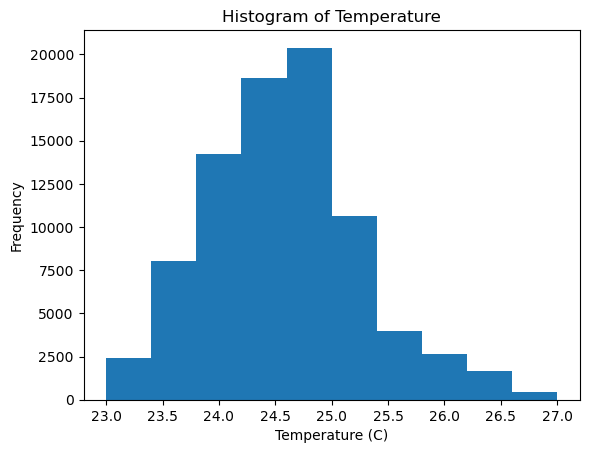

In [46]:
attribute=df['Temperature (C)']

#Plot the histogram
plt.hist(attribute,bins=10)  #Adjust the number of bins as needed
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

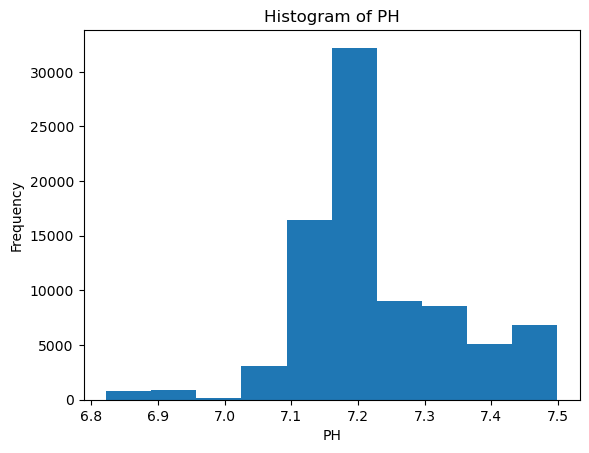

In [47]:
attribute=df['PH']

#Plot the histogram
plt.hist(attribute,bins=10)  #Adjust the number of bins as needed
plt.xlabel('PH')
plt.ylabel('Frequency')
plt.title('Histogram of PH')
plt.show()

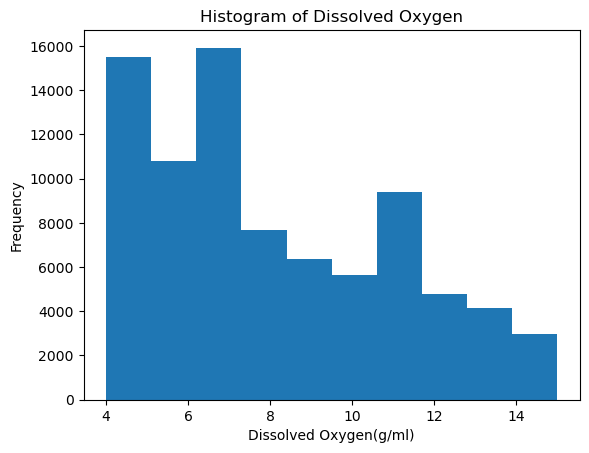

In [48]:
attribute=df['Dissolved Oxygen(g/ml)']

#Plot the histogram
plt.hist(attribute,bins=10)  #Adjust the number of bins as needed
plt.xlabel('Dissolved Oxygen(g/ml)')
plt.ylabel('Frequency')
plt.title('Histogram of Dissolved Oxygen')
plt.show()